## Observations and Insights 

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.DataFrame.merge(mouse_metadata, study_results, on='Mouse ID',how='outer')

# Preview Data
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Number of Mice
num_of_mice = len(df["Mouse ID"].unique())
num_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_duplicated = df[df.duplicated()]
df_duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Drop the redundant mouse


df_clean = df.loc[df["Mouse ID"] != "g989"]

df_clean.to_csv("data/clean_data.csv")


In [8]:
# Number of mice in the clean DataFrame.
mice_pop = len(df_clean["Mouse ID"].unique())
mice_pop

248

## Summary Statistics

In [9]:
# Generate a summary statistics 

df_reg = df_clean.groupby(["Drug Regimen"])

summary_df = pd.DataFrame(df_reg["Tumor Volume (mm3)"].describe())

summary_df = summary_df.rename(columns={"mean" : "Mean Tumor Volume",
                           "50%" : "Median Tumor Volume",
                           "std" : "Std of Tumor Volume"})

summary_df["Var of Tumor Volume"] = (summary_df["Std of Tumor Volume"])**2
summary_df["Std Err of Tumor Volume"] = df_reg["Tumor Volume (mm3)"].sem()
summary_clean_df = summary_df[["Mean Tumor Volume", 
                               "Median Tumor Volume", 
                               "Var of Tumor Volume", 
                               "Std of Tumor Volume", 
                               "Std Err of Tumor Volume"]]
summary_clean_df

,Mean Tumor Volume,Median Tumor Volume,Var of Tumor Volume,Std of Tumor Volume,Std Err of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics with agg method
df_reg_summary = df_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
df_reg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements Taken')

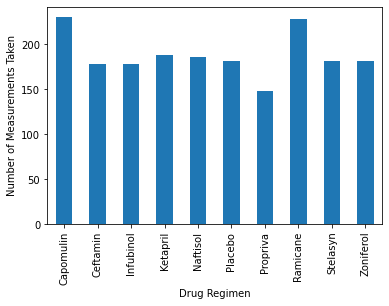

In [11]:
# Bar plot of total number of measurements taken on each drug regimen- pandas
bar = summary_df["count"].plot(kind="bar")
bar.set_ylabel("Number of Measurements Taken")


Text(0, 0.5, 'Number of Measurements Taken')

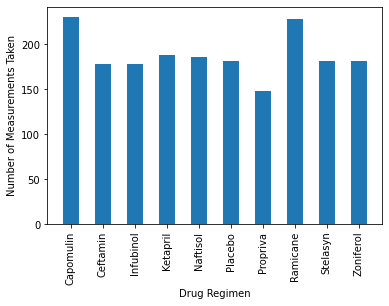

In [12]:
# Bar plot showing the total number of measurements taken on each drug regimen- pyplot.
x_axis = np.arange(len(df_clean["Drug Regimen"].unique()))

plt.bar(x_axis, summary_df["count"], width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin",
                           "Ceftamin", 
                           "Infubinol", 
                           "Ketapril", 
                           "Naftisol", 
                           "Placebo", 
                           "Propriva",
                           "Ramicane", 
                           "Stelasyn", 
                           "Zoniferol"], rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")



<AxesSubplot:ylabel='Sex'>

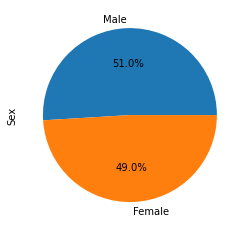

In [13]:
# Female/Male distribution- pandas
df_sex = df_clean["Sex"].value_counts()
df_sex.plot(kind="pie", autopct= "%1.1f%%")

Text(0, 0.5, 'Sex')

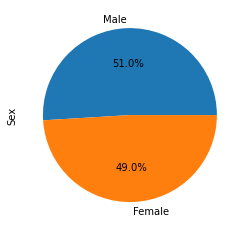

In [14]:
# Female/Male distribution- pyplot
plt.pie(df_sex, labels=["Male", "Female"], autopct= "%1.1f%%")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [15]:
# Final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
df_id = df_clean.groupby("Mouse ID")
max_timepoint = df_id["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_max = pd.DataFrame.merge(df_clean, max_timepoint, how="inner")
df_max

# Pulled just the four of interest
df_max_four = df_max.loc[(df_max["Drug Regimen"] == "Capomulin") | 
                        (df_max["Drug Regimen"] == "Ramicane") | 
                        (df_max["Drug Regimen"] == "Infubinol") |
                        (df_max["Drug Regimen"] == "Ceftamin")]
df_max_four


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tum_vol = [df_max_four["Tumor Volume (mm3)"]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
cap_tum = df_max_four.loc[df_max_four["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ram_tum = df_max_four.loc[df_max_four["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
inf_tum = df_max_four.loc[df_max_four["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
cef_tum = df_max_four.loc[df_max_four["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
    # add subset 
tum_vol_sub = [cap_tum, ram_tum, inf_tum, cef_tum]  
    
# Determine outliers using upper and lower bounds

for x in range(4):
    quartiles = tum_vol_sub[x].quantile([.25,.5,.75])    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = df_max_four.loc[(df_max_four["Drug Regimen"] == treatments[x]) & \
                               (( df_max_four["Tumor Volume (mm3)"] > upper_bound) | \
                                (df_max_four["Tumor Volume (mm3)"] < lower_bound))]
    print(f"{treatments[x]}: The upper bound of the IQR is {round(upper_bound,2)}. \
    The lower bound is {round(lower_bound,2)}.")
    if outliers.empty:
          print("There are no outliers")
    else:      
          print(f"The outliers are {outliers}")
    print("\n")

          

Capomulin: The upper bound of the IQR is 51.83.     The lower bound is 20.7.
There are no outliers


Ramicane: The upper bound of the IQR is 54.31.     The lower bound is 17.91.
There are no outliers


Infubinol: The upper bound of the IQR is 82.74.     The lower bound is 36.83.
The outliers are    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
74     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
74           36.321346                 0  


Ceftamin: The upper bound of the IQR is 87.67.     The lower bound is 25.36.
There are no outliers




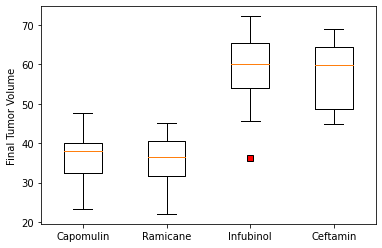

In [18]:
# Box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots(sharey=True)
    
ax1.set_ylabel("Final Tumor Volume")

red_square = dict(markerfacecolor="r", marker="s")
ax1.boxplot(tum_vol_sub, flierprops=red_square)
plt.xticks(np.arange(1,5), treatments)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

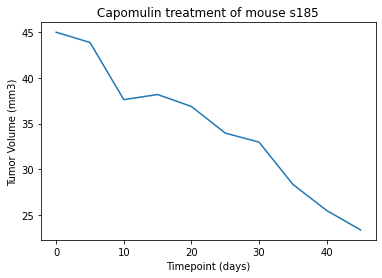

In [17]:
# Capomulin line plot of tumor volume vs. time point
cap_mouse = df_clean.loc[df_clean["Mouse ID"] == "s185"]
x = cap_mouse["Timepoint"]
y = cap_mouse["Tumor Volume (mm3)"]

plt.plot(x,y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

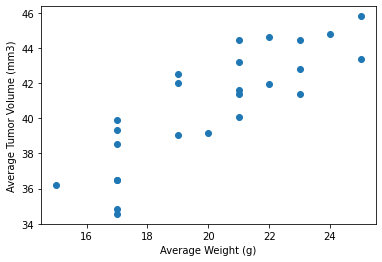

In [19]:
# Capomulin scatter plot of average tumor volume vs. mouse weight 
cap = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"]
cap_id = cap.groupby("Mouse ID")

z = cap_id["Weight (g)"].mean()
w = cap_id["Tumor Volume (mm3)"].mean()


plt.scatter(z,w)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient of Average Weight to average tumor volume is 0.84


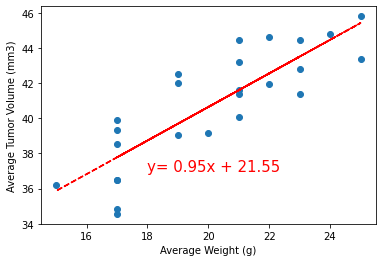

In [20]:
# Capomulin Correlation coefficient and linear regression model 
# for mouse weight and average tumor volume

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(z, w)
regress_values = z * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(z,w)
plt.plot(z, regress_values,"--", color="red")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(18, 37), fontsize=15, color="red")
print(f"The correlation coefficient of Average Weight to average tumor volume is {round(rvalue,2)}")